# Assignment 2

Caroline FAVART - Alexandre LANDEAU - Juan LONDONO - Vivien ROBERT
----------

In [32]:
# Load necessary modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore", category= FutureWarning)

In [33]:
# Load data

data = pd.read_csv('train.csv',sep=',')

# **Section 1: Feature Engineering**

##  **1. Exploring Data**

In [34]:
print(data.describe())
print(data.info())
print("Size of the Data set :", data.shape)
data.head()

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data colu

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


A first exploration of the Data gives us insights on variables' selection, transformation and creation.

* **Selection:** Some features are intuitively likely to be important for the survival classification. For example we know that women (“Sex”), children (“Age”) or rich passengers (“Pclass”) were more likely to survive as they were given priority to get on lifeboats.
* **Transformation:** We kept only the letter of the cabin for the "Cabin" variable to create the “CabinLetter” feature, since it gives us the floor of the passenger's room. We decided not to create bins for the "Age" at the beginning, and decided to test this option later on.
* **Creation:** We decided to create a new variable called "Fsize", that would allow us to know the size of the family of the passenger. We thought it would be of greater use and interpretability than the "SibSp" and "Parch" separate variables. We also created a variable called "Title" by isolating the title from the "Name" variable. This variables allows us to know to which category the passenger belongs : Mr, Mrs, Miss and Master (for young men). We decided to regroup all other titles into a separate category : Special. Indeed, all titles such as Sir, Don, col, Major etc. have few instances, but are a sign of the importance and wealth of the passenger, and might therefore be significant.

## **2. Creation of New Variables**

In [35]:
# Compute family size

data['Fsize'] = data.SibSp + data.Parch + 1

In [36]:
# Feature engineering on Titles

data['Title'] = data['Name'].str.extract('([A-Za-z]+)\.', expand=False)

data['Title'].replace({'Ms':'Miss', 'Mlle':'Miss', 'Mme':'Mrs'}, inplace=True)

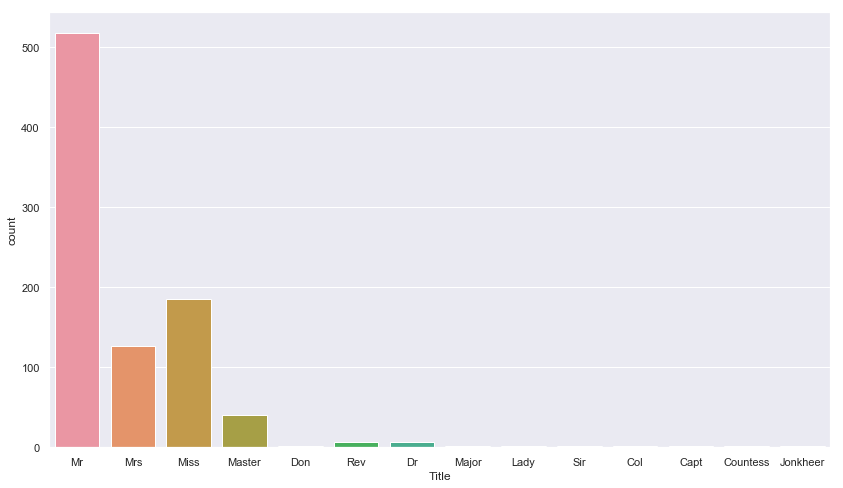

In [37]:
sns.set()

plt.figure(figsize= (14,8))
sns.countplot(data = data, x = 'Title')
plt.show()


As we can see that, appart from a few titles, the others have very few instances, we will regroup them in one group : Special

In [38]:
data['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Jonkheer', 'Countess',
                          'Lady', 'Don', 'Capt', 'Sir'], 'Special', inplace=True)

## **3. Treatment of the NaN**

### **Embarked**
We decided to fill the NA’s with the most recurrent value, which is ‘S’ for Southampton.

In [39]:
# Fill with more recurrent value the NAs in the Embaked predictor

data.Embarked.fillna('S', inplace=True)

### **Age**
We analyzed its repartition as a function of other variables: "Sex", “Pclass”, “Fsize” and “Title”. The objective was to find groups of similar people for which the age variable is available and use the average to fill in the missing values. We decided to retain only the “Pclass” and “Title” criteria since those proved to be truly significative. 

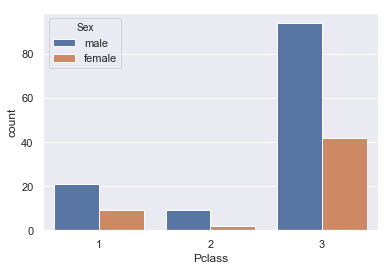

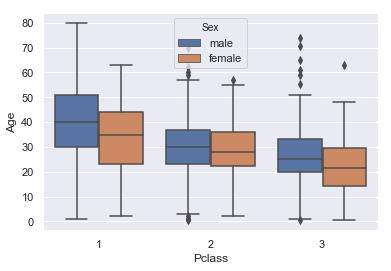

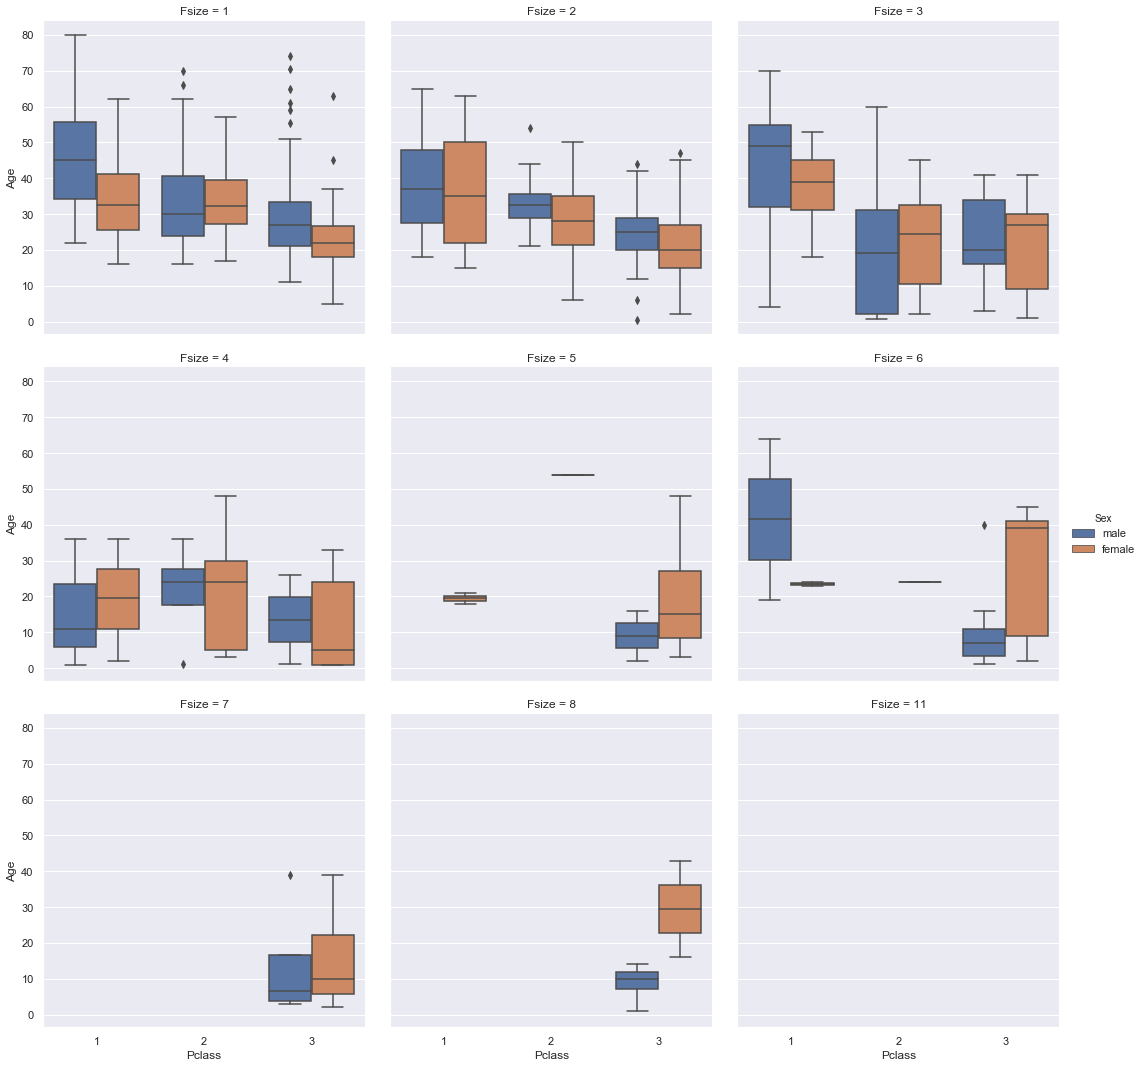

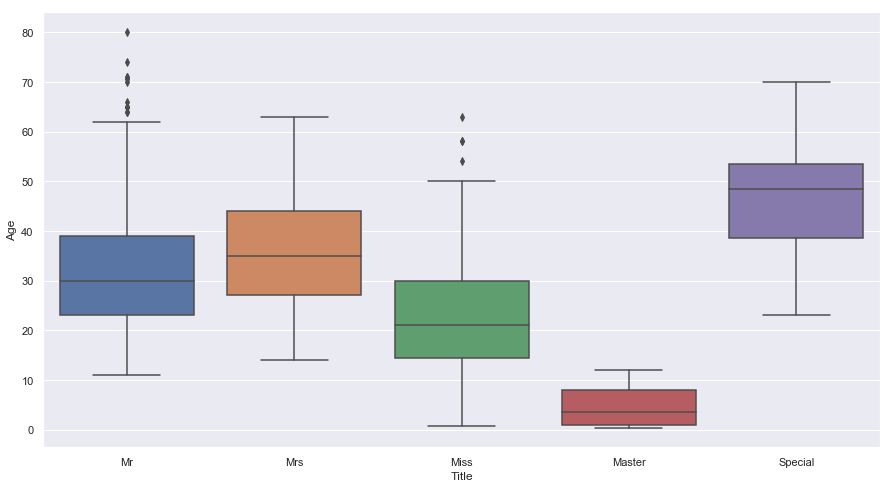

In [40]:
# Class and sex of Passengers with Age = NaN

sns.set()

sns.countplot(data = data[ data['Age'].isna() ], x = 'Pclass', hue= 'Sex' )
plt.show()

# Plot the ages distribution for groups of similar class and sex

sns.boxplot(data=data, x='Pclass', y='Age', hue='Sex')
plt.show()

# Plot the ages distribution for groups of similar class, sex and family size

sns.catplot(data=data, x='Pclass', y='Age', hue='Sex', col='Fsize', col_wrap=3, 
            kind='box', legend=True, margin_titles=True)
plt.show()

# Plot the ages distribution for groups of similar class, sex and family size

sns.set()

title_vs_age = plt.figure(figsize=(15,8))
sns.boxplot(data=data, x='Title', y='Age')
plt.show()

In [41]:
    # Replace missing values in Age with the mean of similar people ages

data.Age = data.groupby(['Title', 'Pclass'])['Age'].apply(lambda x : x.fillna(x.mean()))


### **Cabin**
This variable was problematic, since only 23% of its values are non-null. We calculated the survival rate as a function of the available cabin letter, and found that there were huge variations from one letter to another. We tried to see it was possible to find the best suited letter for cabin using the “Fare” feature, but this was not significant. Therefore, we decided to keep this variable, and to replace the NA by a new category, U for undefined.

For cabins C, the percentage survival is 59.32%
For cabins E, the percentage survival is 75.00%
For cabins G, the percentage survival is 50.00%
For cabins D, the percentage survival is 75.76%
For cabins A, the percentage survival is 46.67%
For cabins B, the percentage survival is 74.47%
For cabins F, the percentage survival is 61.54%
For cabins T, the percentage survival is 0.00%
For cabins NaN, the percentage survival is nan%


For cabins C, the mean fare is 100
For cabins E, the mean fare is 46
For cabins G, the mean fare is 13
For cabins D, the mean fare is 57
For cabins A, the mean fare is 39
For cabins B, the mean fare is 113
For cabins F, the mean fare is 18
For cabins T, the mean fare is 35


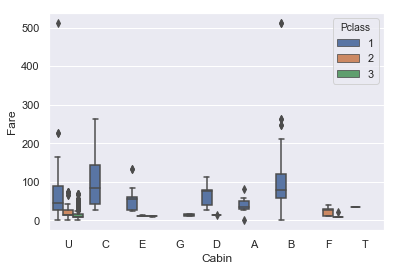

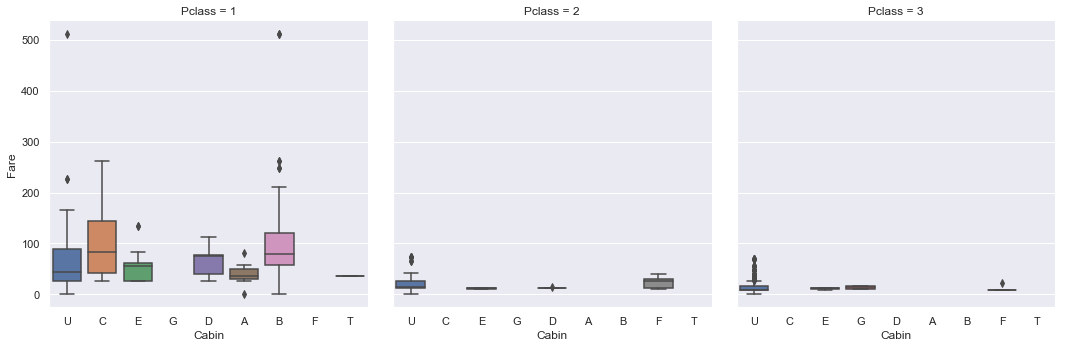

In [42]:
### CABIN :

# Replace NaN by a constant U :
data.Cabin.fillna('U', inplace=True)

# isolate the letter :
data.Cabin = data.Cabin.apply(lambda x : str(x)[0])

# Is the information important ? 

percentage_survival_letter = []

for letter in data["Cabin"].unique()[1:]:
    percentage_survival_letter.append(letter)
    m=data[(data['Cabin']==letter)]['Survived'].mean()
    percentage_survival_letter.append(m)
    print("For cabins {0}, the percentage survival is {1:.2f}%".format(letter,(m*100)))

percentage_survival_letter.append('NaN')
m=data[(data['Cabin'].isna())]['Survived'].mean()
percentage_survival_letter.append(m)
print("For cabins {0}, the percentage survival is {1:.2f}%".format('NaN',(m*100)))
print("\n")

# Is it possible to fill in the NA for example using Fare ? 

# Mean fare per letter 
mean_fare_per_letter = []
for letter in (data["Cabin"].unique())[1:] :
    mean_fare_per_letter.append(letter)
    m=data[data['Cabin']==letter]['Fare'].mean()
    mean_fare_per_letter.append(m)
    print("For cabins {0}, the mean fare is {1}".format(letter,int(m)))


# Boxplot of Fares per letter 
sns.set()

sns.boxplot(data=data, x='Cabin', y='Fare',hue='Pclass')
plt.show()

sns.catplot(data=data, x='Cabin', y='Fare', col='Pclass', col_wrap=3, 
            kind='box', legend=True, margin_titles=True)
plt.show() # We can see that it would be too approximative


# Clean the Cabin column, we replace the unique T value by A, which is the values for same-class cabins

data['Cabin'].replace({'T':'A'}, inplace=True)

## **4. Creation of Dummy Variables**

We created dummy variables for “Sex", "Cabin", “Title” and "Embarked", but there was no need to do so for "Pclass" since it is of ordinal type. 

In [43]:
# Replacing sex with numeric values
data['Sex'] = data['Sex'].map({'female': 1, 'male': 0})

In [44]:
# Creatin a dummy-free copy of the Data
data_2 = data

data = pd.get_dummies(data = data, columns=['Embarked', 'Title', 'Cabin' ], drop_first= True )

# No dummy for class since it corresponds to correlated numerical values, in increasing order

In [45]:
# As we lost a degree of freedom by creating dummies for each category, we have to keep in mind that :
# for Title, we lost Master
# for Cabin, we lost A
# for Embarked, we lost C

data.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Fsize', 'Embarked_Q', 'Embarked_S',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Special', 'Cabin_B',
       'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_U'],
      dtype=object)

## **5. Dropping Data** 

We decided to drop “SibSp”, “Parch” and “Name” since we had already transformed those variables. We also dropped “PassengerId”, “Ticket” since those variables don’t give insightful indications.

In [46]:
# Drop unuseful data 
data.drop(['PassengerId', 'Name', 'Ticket', 'SibSp', 'Parch'], 
          inplace=True, axis=1)

Should we drop "Pclass" and keep only "Fare" ? Maybe, it gives the same information, only with more precision.

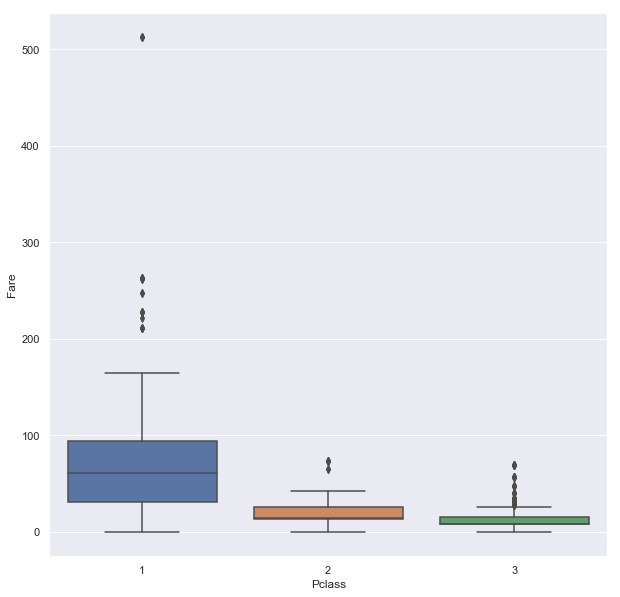

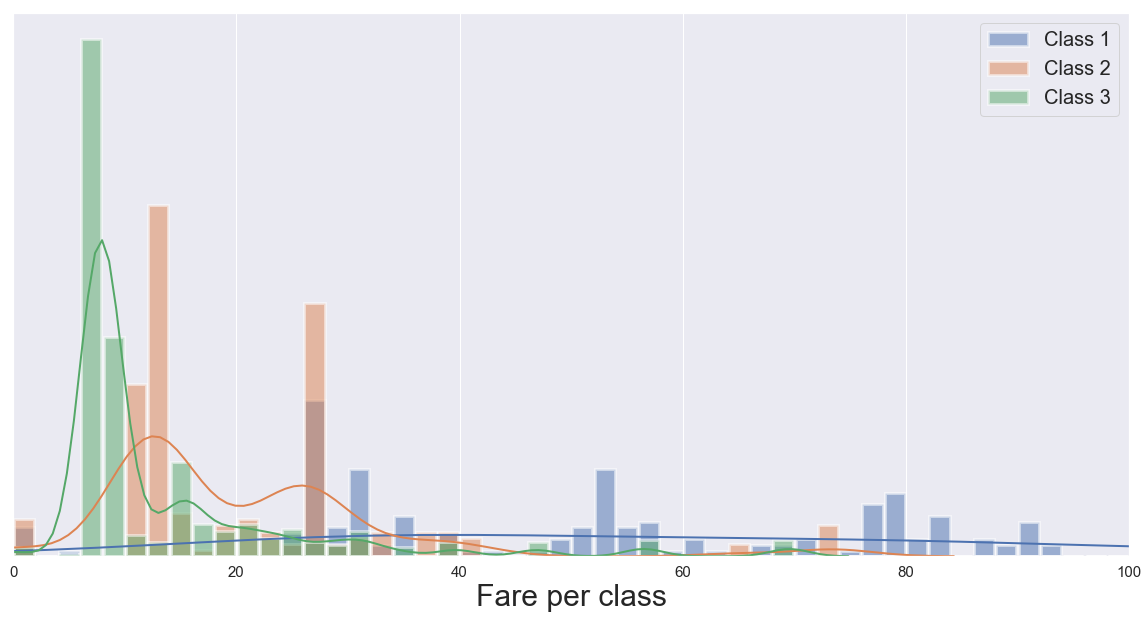

In [47]:
bxplt_fare_per_class = plt.figure(figsize=(10,10))
sns.boxplot(data=data, x='Pclass', y='Fare')
plt.show()

hist_fare_per_class = plt.figure(figsize=(20,10), facecolor='white')
for i in range(3):
    sns.distplot(data["Fare"][data["Pclass"]==(i+1)], 
                 bins = np.arange(0,201,2), kde_kws={"lw": 2},
                 hist_kws={"linewidth": 3, "rwidth": 0.9, "alpha": 0.5, "label": "Class {}".format((i+1))})
plt.xlabel("Fare per class", size=30)    
plt.xlim((0, 100))
plt.legend(fontsize=20)
plt.yticks([])
plt.xticks(fontsize=15)
plt.show()

As we can see, both variables give different infomations, since the density functions per fare have many common areas.
Thus, we decided to keep both.

## **6. Scaling Data** 

We decided to perform a min-max scaling on the “Fare”, “Age” and “Fsize” variables to map the entire range of values between 0 and 1. This made the training less sensitive to features’ scale.

In [48]:
data.Fsize = (data.Fsize - min(data.Fsize))/(max(data.Fsize)-min(data.Fsize))
data.Fsize = round(data.Fsize, 2)

data.Age = (data.Age - min(data.Age))/(max(data.Age)-min(data.Age))
data.Age = round(data.Age, 2)

data.Fare = (data.Fare - min(data.Fare))/(max(data.Fare)-min(data.Fare))
data.Fare = round(data.Fare, 2)

## **7. Correlation Between Features** 

### *Correlation Matrix*
Through a correlation matrix, we checked if some features were too highly correlated so that one would not add any additional information to the model. If some features were unsurprisingly correlated (Sex and Title, Pclass and Cabin), their correlations were not too close to one. This was a sign that they were still providing some additional and useful information to the model and we decided to keep them, for now.

In [49]:
# Create a correlation matrix
corr_mat = data_2.copy()

    # Map the Cabin variable 
corr_mat['Cabin'] = corr_mat['Cabin'].map({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 
                                       'G': 6, 'U': 7})
    # Map the Embarked variable
corr_mat['Embarked'] = corr_mat['Embarked'].map({'S': 0, 'Q': 1, 'C': 0})

    # Map the Title variable
corr_mat['Title'] = corr_mat['Title'].map({'Mr': 0, 'Mrs': 1, 'Master': 2,
                                       'Miss': 3, 'Special': 4})

# Drop unuseful data 
corr_mat.drop(['PassengerId', 'Name', 'Ticket', 'SibSp', 'Parch'], 
          inplace=True, axis=1)

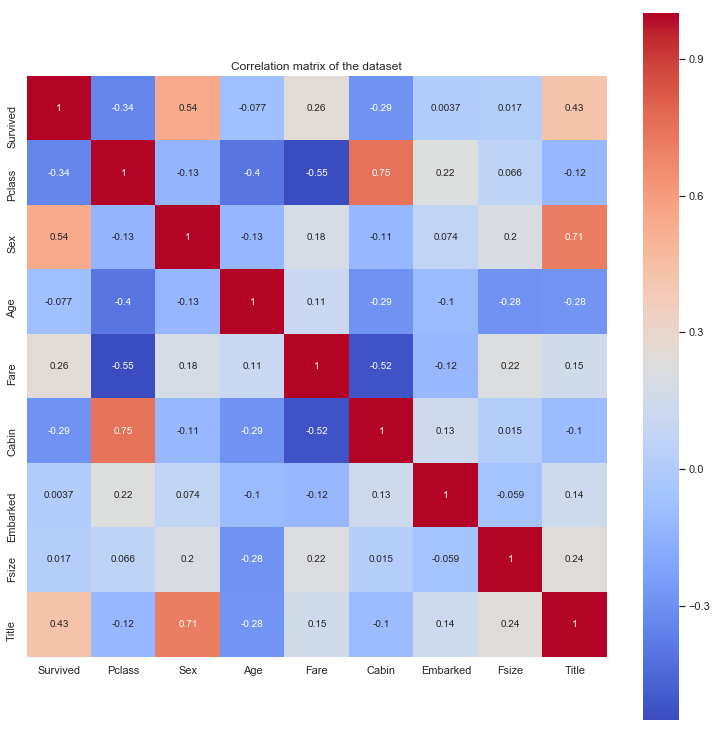

In [50]:
plt.figure(figsize = (13,13))
sns.heatmap(corr_mat.corr(), annot=True, annot_kws={'fontsize': 10}, cmap='coolwarm', square=True)
plt.title('Correlation matrix of the dataset')
plt.show()

### *VIF Interpretation*
To shed light on highly multicorrelated variables, which might be a real issue for some models, we ran a VIF (Variance Inflation Factor) Test. 

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

vif = [VIF(np.asarray(data), i) for i in range(data.shape[1])]


# For each X, calculate VIF and save in dataframe
vif_df = pd.DataFrame()
vif_df["VIF Factor"] = vif
vif_df["features"] = data.columns

print(vif_df[vif_df["VIF Factor"] > 5])

    VIF Factor    features
1    24.888700      Pclass
2   124.551182         Sex
3     9.730607         Age
7     5.299107  Embarked_S
8    80.146636  Title_Miss
9    18.138879    Title_Mr
10   55.868850   Title_Mrs
18   35.291904     Cabin_U


Some variables are higly multicorrelated, such as Title, Sex, and Cabin_U. Indeed, Title also accounts for the Sex of the passenger. Cabin_U is a variable randomly assigned to the NaN of the Cabin variable. Therefore, its high multicorrelation seems natural.

Let's run the VIF test again, after dropping the variables "Sex" and "Cabin_U".

In [52]:
data_vif = data.drop(['Sex','Cabin_U'], axis=1)
vif2 = [VIF(np.asarray(data_vif), i) for i in range(data_vif.shape[1])]

# For each X, calculate VIF and save in dataframe
vif2_df = pd.DataFrame()
vif2_df["VIF Factor"] = vif2
vif2_df["features"] = data_vif.columns

print(vif2_df[vif2_df["VIF Factor"] > 5])

   VIF Factor    features
1   13.809100      Pclass
2    9.597911         Age
6    5.075207  Embarked_S
7    5.061373  Title_Miss
8   15.725061    Title_Mr


As we can see, the number of highly multicorrelated variables was divided by two. We might want to consider suppressing those variables. 

## **7. Feature Selection** 

Although we can see that some variables are highly correlated or multicorrelated with others, we decided to keep all variables. Indeed, we will perform some feature selection and regularization for each model in the following section.

# **Section 2: Model Tuning and Comparison**


## **1. Data Preprocessing** 

Isolating target from predictors

In [53]:
X = data.drop('Survived', axis=1)
y = data.Survived

First, we need to do the same data preprocessing on the test data than we did on the training set. 

In [90]:
# Load data_test

data_test = pd.read_csv('test.csv')

print(data_test.describe())
print(data_test.info())
data_test.head()

# Compute family size

data_test['Fsize'] = data_test.SibSp + data_test.Parch + 1
data_test.Fsize = (data_test.Fsize - min(data_test.Fsize))/(max(data_test.Fsize)-min(data_test.Fsize))
data_test.Fsize = round(data_test.Fsize, 2)

# Feature engineering on Titles

data_test['Title'] = data_test['Name'].str.extract('([A-Za-z]+)\.', expand=False)

data_test['Title'].replace({'Ms':'Miss', 'Mlle':'Miss', 'Mme':'Mrs'}, inplace=True)

data_test['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Jonkheer', 'Countess',
                          'Lady', 'Don', 'Capt', 'Sir', 'Dona'], 'Special', inplace=True)

# Data cleaning for the Fare column

data_test.Fare = data_test.groupby(['Title', 'Pclass'])['Fare'].apply(lambda x : x.fillna(x.mean()))

# Data cleaning for the Age column

    # Replace missing values in Age with the mean of similar people ages

data_test.Age = data_test.groupby(['Title', 'Pclass'])['Age'].apply(lambda x : x.fillna(x.mean()))

data_test.Age = (data_test.Age - min(data_test.Age))/(max(data_test.Age)-min(data_test.Age))
data_test.Age = round(data_test.Age, 2)

# Fill with more recurrent value the NAs in the Embaked predictor

data_test.Embarked.fillna('S', inplace=True)

# Clean the Cabin column, we replace the unique T value by A, which is the values for same-class cabins

data_test.Cabin.fillna('U', inplace=True)
data_test.Cabin = data_test.Cabin.apply(lambda x : str(x)[0])
data_test.loc[data_test.Cabin == 'T', 'Cabin'] = 'A'

# Scale the Fare column

data_test.Fare = (data_test.Fare - min(data_test.Fare))/(max(data_test.Fare)-min(data_test.Fare))
data_test.Fare = round(data_test.Fare, 2)

test_id = pd.DataFrame(data_test.PassengerId)

# Replacing sex with numeric values
data_test['Sex'] = data_test['Sex'].map({'female': 1, 'male': 0})

# Drop unuseful data 
data_test.drop(['PassengerId', 'Name', 'Ticket', 'SibSp', 'Parch'], 
          inplace=True, axis=1)

# Get dummy variables
X_test = pd.get_dummies(data_test, columns=['Cabin', 'Embarked', 'Title'], drop_first=True)

X_test.columns.values

       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp     

array(['Pclass', 'Sex', 'Age', 'Fare', 'Fsize', 'Cabin_B', 'Cabin_C',
       'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_U',
       'Embarked_Q', 'Embarked_S', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Special'], dtype=object)

## **2. Assessing Different Models** 

Importing the models we want to test

In [55]:
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectFromModel

from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

### **A First Comparison**
We will now compare various Machine Learning models with cross validation in order to choose which ones to optimize

In [57]:
models = [
    # Linear model
    LogisticRegressionCV(),
    SGDClassifier(penalty='elasticnet'),
    RidgeClassifierCV(),
    Perceptron(),
    # Naive Bayes
    GaussianNB(),
    BernoulliNB(),
    # Nearest Neighbors
    KNeighborsClassifier(),
    # Ensemble methods
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    ExtraTreesClassifier(),
    BaggingClassifier(),
    AdaBoostClassifier(),
    # Tree
    DecisionTreeClassifier(),
    # Support Vector Classification
    LinearSVC(),
    SVC(probability=True, kernel='linear'),
    # LDA
    LinearDiscriminantAnalysis()
]

cv_split = ShuffleSplit(n_splits = 5, test_size = .2, train_size = .7, random_state = 33 )

models_columns = ['model_name', 'model_params','model_train_acc_mean', 
                  'model_test_acc_mean', 'model_test_acc_3*std' ,'model_fit_time']

models_compare = pd.DataFrame(columns = models_columns)

models_predict = pd.DataFrame(y)

models_test = test_id.copy()


In [58]:
for model in models:
    
    model_name = model.__class__.__name__
    print(model_name)
    models_compare.loc[index, 'model_name'] = model_name
    models_compare.loc[index, 'model_params'] = str(model.get_params())
    
    cv_score = cross_validate(model, X, y, scoring='accuracy',cv=cv_split)
    
    models_compare.loc[index, 'model_fit_time'] = cv_score['fit_time'].mean()
    models_compare.loc[index, 'model_train_acc_mean'] = cv_score['train_score'].mean()
    models_compare.loc[index, 'model_test_acc_mean'] = cv_score['test_score'].mean() 
    
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, 
    #should statistically capture 99.7% of the subsets
    models_compare.loc[index, 'model_test_acc_3*std'] = cv_score['test_score'].std()*3
    
    model.fit(X, y)
    models_predict[model_name] = model.predict(X)
    models_test[model_name] = model.predict(X_test)
    
    index += 1

models_compare.sort_values(by = ['model_test_acc_mean'], ascending = False, inplace = True)
models_compare

LogisticRegressionCV
SGDClassifier
RidgeClassifierCV
Perceptron
GaussianNB
BernoulliNB
KNeighborsClassifier
RandomForestClassifier
GradientBoostingClassifier
ExtraTreesClassifier
BaggingClassifier
AdaBoostClassifier
DecisionTreeClassifier
LinearSVC
SVC
LinearDiscriminantAnalysis


C:\Users\juann\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


,model_name,model_params,model_train_acc_mean,model_test_acc_mean,model_test_acc_3*std,model_fit_time
18,RidgeClassifierCV,"{'alphas': (0.1, 1.0, 10.0), 'class_weight': N...",0.839807,0.824581,0.0405018,0.0146815
29,LinearSVC,"{'C': 1.0, 'class_weight': None, 'dual': True,...",0.839807,0.818994,0.0525734,0.0364738
16,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': None, '...",0.841413,0.817877,0.0576692,0.51587
30,SVC,"{'C': 1.0, 'cache_size': 200, 'class_weight': ...",0.830819,0.81676,0.0402235,0.0781013
31,LinearDiscriminantAnalysis,"{'n_components': None, 'priors': None, 'shrink...",0.839807,0.81676,0.0341834,0.0102732
23,RandomForestClassifier,"{'bootstrap': True, 'class_weight': None, 'cri...",0.959551,0.811173,0.0630667,0.0358045
22,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.857143,0.810056,0.061807,0.00434747
24,GradientBoostingClassifier,"{'criterion': 'friedman_mse', 'init': None, 'l...",0.899197,0.810056,0.0580576,0.168998
26,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.95634,0.808939,0.0584433,0.0362797
27,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.85297,0.804469,0.0462035,0.175047


### **Comparison with Backward Selection**
We will now perform the same operation with backward feature selection

In [77]:
models_sel = [
    # Linear model
    LogisticRegressionCV(cv=3),
    SGDClassifier(penalty='elasticnet'),
    RidgeClassifierCV(),
    Perceptron(),
    # Ensemble methods
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    ExtraTreesClassifier(),
    AdaBoostClassifier(),
    # Tree
    DecisionTreeClassifier(),
    # Support Vector Classification
    LinearSVC(),
    SVC(probability=True, kernel='linear'),
    # LDA
    LinearDiscriminantAnalysis()
]

models_compare_sel = pd.DataFrame(columns = models_columns)

models_predict_sel = pd.DataFrame(y)

models_test_sel = test_id.copy()

index = 0

In [78]:
for model in models_sel:
    
    model_name = model.__class__.__name__
    print(model_name)
    models_compare_sel.loc[index, 'model_name'] = model_name
    models_compare_sel.loc[index, 'model_params'] = str(model.get_params())
    
    model = RFECV(estimator=model, step=1, cv=3)
    
    cv_score = cross_validate(model, X, y,cv=cv_split)
    
    models_compare_sel.loc[index, 'model_fit_time'] = cv_score['fit_time'].mean()
    models_compare_sel.loc[index, 'model_train_acc_mean'] = cv_score['train_score'].mean()
    models_compare_sel.loc[index, 'model_test_acc_mean'] = cv_score['test_score'].mean() 
    
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, 
    #should statistically capture 99.7% of the subsets
    models_compare_sel.loc[index, 'model_test_acc_3*std'] = cv_score['test_score'].std()*3
    
    model.fit(X, y)
    models_compare_sel.loc[index, 'model_n_features'] = model.n_features_
    models_compare_sel.loc[index, 'model_features'] = str(model.support_)
    models_predict_sel[model_name] = model.predict(X)
    models_test_sel[model_name] = model.predict(X_test)
    
    index += 1

models_compare_sel.sort_values(by = ['model_test_acc_mean'], ascending = False, inplace = True)
models_compare_sel

LogisticRegressionCV
SGDClassifier
RidgeClassifierCV
Perceptron
RandomForestClassifier
GradientBoostingClassifier
ExtraTreesClassifier
AdaBoostClassifier
DecisionTreeClassifier
LinearSVC
SVC
LinearDiscriminantAnalysis


,model_name,model_params,model_train_acc_mean,model_test_acc_mean,model_test_acc_3*std,model_fit_time,model_n_features,model_features
2,RidgeClassifierCV,"{'alphas': (0.1, 1.0, 10.0), 'class_weight': N...",0.835955,0.825698,0.0402235,0.285326,17.0,[ True True True True True True True Tr...
0,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': 3, 'dua...",0.838202,0.821229,0.0635989,17.1878,15.0,[ True True True True True False True Tr...
9,LinearSVC,"{'C': 1.0, 'class_weight': None, 'dual': True,...",0.837881,0.821229,0.0570817,1.21112,12.0,[ True True True True True False False Tr...
10,SVC,"{'C': 1.0, 'cache_size': 200, 'class_weight': ...",0.830819,0.815642,0.0410529,2.22031,18.0,[ True True True True True True True Tr...
11,LinearDiscriminantAnalysis,"{'n_components': None, 'priors': None, 'shrink...",0.839807,0.815642,0.0382182,0.205114,16.0,[ True True True True True False True Tr...
5,GradientBoostingClassifier,"{'criterion': 'friedman_mse', 'init': None, 'l...",0.896629,0.812291,0.0632446,10.8781,13.0,[ True True True True True True True Fal...
6,ExtraTreesClassifier,"{'bootstrap': False, 'class_weight': None, 'cr...",0.961477,0.797765,0.10244,2.61344,5.0,[ True False True True True False False Fal...
7,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.846228,0.797765,0.0830582,12.7733,11.0,[False False True True True False False Fal...
4,RandomForestClassifier,"{'bootstrap': True, 'class_weight': None, 'cri...",0.949599,0.796648,0.0945703,2.57932,6.0,[ True True True True True False False Fal...
8,DecisionTreeClassifier,"{'class_weight': None, 'criterion': 'gini', 'm...",0.894703,0.774302,0.070789,0.29042,4.0,[False False True True True False False Fal...


### **Comparison with tree selection**
Let us now use a tree model for feature selection

In [62]:
# Use tree model for feature selection

tree = ExtraTreesClassifier(n_estimators=100, criterion='gini', random_state=33)
treeSelection = SelectFromModel(tree)
treeSelection.fit(X, y)

feature_idx = treeSelection.get_support()
feature_name = X.columns[feature_idx]

X_tree = treeSelection.transform(X)
X_tree = pd.DataFrame(X_tree, columns=feature_name)

X_test_tree = treeSelection.transform(X_test)
X_test_tree = pd.DataFrame(X_test_tree, columns=feature_name)

In [63]:
models = [
    # Linear model
    LogisticRegressionCV(),
    SGDClassifier(penalty='elasticnet'),
    RidgeClassifierCV(),
    Perceptron(),
    # Naive Bayes
    GaussianNB(),
    BernoulliNB(),
    # Nearest Neighbors
    KNeighborsClassifier(),
    # Ensemble methods
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    ExtraTreesClassifier(),
    BaggingClassifier(),
    AdaBoostClassifier(),
    # Tree
    DecisionTreeClassifier(),
    # Support Vector Classification
    LinearSVC(),
    SVC(probability=True, kernel='linear'),
    # LDA
    LinearDiscriminantAnalysis()
]

cv_split = ShuffleSplit(n_splits = 5, test_size = .2, train_size = .7, random_state = 33 )

models_columns = ['model_name', 'model_params','model_train_acc_mean', 
                  'model_test_acc_mean', 'model_test_acc_3*std' ,'model_fit_time']

models_compare_treeSel = pd.DataFrame(columns = models_columns)

models_predict_treeSel = pd.DataFrame(y)

models_test_treeSel = test_id.copy()

index = 0

In [64]:
for model in models:

    model_name = model.__class__.__name__
    print(model_name)
    models_compare_treeSel.loc[index, 'model_name'] = model_name
    models_compare_treeSel.loc[index, 'model_params'] = str(model.get_params())

    cv_score = cross_validate(model, X_tree, y, scoring='accuracy',cv=cv_split, 
                              return_train_score=True)

    models_compare_treeSel.loc[index, 'model_fit_time'] = cv_score['fit_time'].mean()
    models_compare_treeSel.loc[index, 'model_train_acc_mean'] = cv_score['train_score'].mean()
    models_compare_treeSel.loc[index, 'model_test_acc_mean'] = cv_score['test_score'].mean() 

    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, 
    #should statistically capture 99.7% of the subsets
    models_compare_treeSel.loc[index, 'model_test_acc_3*std'] = cv_score['test_score'].std()*3

    model.fit(X_tree, y)
    models_predict_treeSel[model_name] = model.predict(X_tree)
    models_test_treeSel[model_name] = model.predict(X_test_tree)

    index += 1
    
models_compare_treeSel.sort_values(by = ['model_test_acc_mean'], ascending = False, inplace = True)
models_compare_treeSel

LogisticRegressionCV
SGDClassifier
RidgeClassifierCV
Perceptron
GaussianNB
BernoulliNB
KNeighborsClassifier
RandomForestClassifier
GradientBoostingClassifier
ExtraTreesClassifier
BaggingClassifier
AdaBoostClassifier
DecisionTreeClassifier
LinearSVC
SVC
LinearDiscriminantAnalysis


,model_name,model_params,model_train_acc_mean,model_test_acc_mean,model_test_acc_3*std,model_fit_time
8,GradientBoostingClassifier,"{'criterion': 'friedman_mse', 'init': None, 'l...",0.892135,0.810056,0.0437042,0.186019
6,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.85618,0.807821,0.0444687,0.0081821
10,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.941894,0.807821,0.0546687,0.0462775
14,SVC,"{'C': 1.0, 'cache_size': 200, 'class_weight': ...",0.805778,0.807821,0.0877931,0.0542666
13,LinearSVC,"{'C': 1.0, 'class_weight': None, 'dual': True,...",0.811557,0.807821,0.0566867,0.0181261
0,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': None, '...",0.817014,0.804469,0.0508349,0.238379
2,RidgeClassifierCV,"{'alphas': (0.1, 1.0, 10.0), 'class_weight': N...",0.810273,0.804469,0.0599616,0.0125665
15,LinearDiscriminantAnalysis,"{'n_components': None, 'priors': None, 'shrink...",0.810915,0.804469,0.0711057,0.0155882
11,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.83756,0.803352,0.0914292,0.142821
9,ExtraTreesClassifier,"{'bootstrap': False, 'class_weight': None, 'cr...",0.953451,0.798883,0.0351556,0.0452938


### **Data Categorization**

Let us now categorize the data to try to improve the models.

In [99]:
# Train Set

# Read the data

data_cat = pd.read_csv('train.csv')

# Compute family size

data_cat['Fsize'] = data_cat.SibSp + data_cat.Parch + 1

def family_cat(x):
    if x == 1: x = 'single'
    else:
        if x <= 4: x = 'small_family'
        else: x = 'large_family'
    return x

data_cat.Fsize = data_cat.Fsize.apply(family_cat)

# Feature engineering on Titles

data_cat['Title'] = data_cat['Name'].str.extract('([A-Za-z]+)\.', expand=False)

data_cat['Title'].replace({'Ms':'Miss', 'Mlle':'Miss', 'Mme':'Mrs'}, inplace=True)

data_cat['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Jonkheer', 'Countess',
                          'Lady', 'Don', 'Capt', 'Sir', 'Dona'], 'Special', inplace=True)

    # Replace missing values in Age with the mean of similar people ages

data_cat.Age = data_cat.groupby(['Title', 'Pclass'])['Age'].apply(lambda x : x.fillna(x.mean()))

    # Deal with the only family of Fsize = 11

data_cat.Age = data_cat.groupby(['Title', 'Pclass'])['Age'].apply(lambda x : x.fillna(x.mean()))

data_cat.Age = pd.cut(data_cat.Age, bins=8, right=True, precision=0, labels=['0-10',
                    '11-20', '21-30', '31-40', '41-50','51-60', '61-70', '71-80'])

# Fill with more recurrent value the NAs in the Embaked predictor

data_cat.Embarked.fillna('S', inplace=True)

# Clean the Cabin column, we replace the unique T value by A, which is the values for same-class cabins

data_cat.Cabin.fillna('U', inplace=True)
data_cat.Cabin = data_cat.Cabin.apply(lambda x : str(x)[0])
data_cat.loc[data_cat.Cabin == 'T', 'Cabin'] = 'A'

# Scale the Fare column
data_cat.Fare = pd.cut(data_cat.Fare, 60, precision = 0, right=True, include_lowest=True, 
                      labels = list(range(60)))

# Drop unuseful data 
data_cat.drop(['PassengerId', 'Name', 'Ticket', 'SibSp', 'Parch'], inplace=True, axis=1)

# Replacing sex with numeric values
data_cat['Sex'] = data_cat['Sex'].map({'female': 1, 'male': 0})

# Isolate target from predictors

X_cat = data_cat.drop('Survived', axis=1)
y_cat = data_cat.Survived

# Get dummy variables

X_cat = pd.get_dummies(X_cat, columns=['Cabin', 'Embarked', 'Title', 
                                       'Age', 'Fare', 'Fsize'], drop_first=True)

In [100]:
# For Test set

# Categorize Age, Fare and Fsize

# Read the data

data_cat_test = pd.read_csv('test.csv')

# Compute family size

data_cat_test['Fsize'] = data_cat_test.SibSp + data_cat_test.Parch + 1

def family_cat(x):
    if x == 1: x = 'single'
    else:
        if x <= 4: x = 'small_family'
        else: x = 'large_family'
    return x

data_cat_test.Fsize = data_cat_test.Fsize.apply(family_cat)

# Feature engineering on Titles

data_cat_test['Title'] = data_cat_test['Name'].str.extract('([A-Za-z]+)\.', expand=False)

data_cat_test['Title'].replace({'Ms':'Miss', 'Mlle':'Miss', 'Mme':'Mrs'}, inplace=True)

data_cat_test['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Jonkheer', 'Countess',
                          'Lady', 'Don', 'Capt', 'Sir', 'Dona'], 'Special', inplace=True)


# Data cleaning for the Fare column

data_cat_test.Fare = data_cat_test.groupby(['Title', 'Pclass'])['Fare'].apply(lambda x : x.fillna(x.mean()))

    # Replace missing values in Age with the mean of similar people ages

data_cat_test.Age = data_cat_test.groupby(['Title', 'Pclass'])['Age'].apply(lambda x : x.fillna(x.mean()))

    # Deal with the only family of Fsize = 11

data_cat_test.Age = data_cat_test.groupby(['Title', 'Pclass'])['Age'].apply(lambda x : x.fillna(x.mean()))

data_cat_test.Age = pd.cut(data_cat_test.Age, bins=8, right=True, precision=0, labels=['0-10',
                    '11-20', '21-30', '31-40', '41-50','51-60', '61-70', '71-80'])

# Fill with more recurrent value the NAs in the Embaked predictor

data_cat_test.Embarked.fillna('S', inplace=True)

# Clean the Cabin column, we replace the unique T value by A, which is the values for same-class cabins

data_cat_test.Cabin.fillna('U', inplace=True)
data_cat_test.Cabin = data_cat_test.Cabin.apply(lambda x : str(x)[0])
data_cat_test.loc[data_cat_test.Cabin == 'T', 'Cabin'] = 'A'

# Scale the Fare column
data_cat_test.Fare = pd.cut(data_cat_test.Fare, 60, precision = 0, right=True, include_lowest=True, 
                      labels = list(range(60)))

# Replacing sex with numeric values
data_cat_test['Sex'] = data_cat_test['Sex'].map({'female': 1, 'male': 0})

# Drop unuseful data 
data_cat_test.drop(['PassengerId', 'Name', 'Ticket', 'SibSp', 'Parch'], inplace=True, axis=1)

# Get dummy variables

X_cat_test = pd.get_dummies(data_cat_test, columns=['Cabin', 'Embarked', 'Title', 
                                       'Age', 'Fare', 'Fsize'], drop_first=True)

In [104]:
# Compare various Machine Learning models with cross validation in order to choose
# which ones to optimize

models = [
    # Linear model
    LogisticRegressionCV(),
    SGDClassifier(penalty='elasticnet'),
    RidgeClassifierCV(),
    Perceptron(),
    # Naive Bayes
    GaussianNB(),
    BernoulliNB(),
    # Nearest Neighbors
    KNeighborsClassifier(),
    # Ensemble methods
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    ExtraTreesClassifier(),
    BaggingClassifier(),
    AdaBoostClassifier(),
    # Tree
    DecisionTreeClassifier(),
    # Support Vector Classification
    LinearSVC(),
    SVC(probability=True, kernel='linear'),
    # LDA
    LinearDiscriminantAnalysis()
]

cv_split = ShuffleSplit(n_splits = 5, test_size = .2, train_size = .7, random_state = 33 )

models_columns = ['model_name', 'model_params','model_train_acc_mean', 
                  'model_test_acc_mean', 'model_test_acc_3*std' ,'model_fit_time']

models_compare_cat = pd.DataFrame(columns = models_columns)

models_predict_cat = pd.DataFrame(y_cat)

models_test_cat = test_id.copy()

index = 0

In [105]:
for model in models:
    
    model_name = model.__class__.__name__
    print(model_name)
    models_compare_cat.loc[index, 'model_name'] = model_name
    models_compare_cat.loc[index, 'model_params'] = str(model.get_params())
    
    cv_score = cross_validate(model, X_cat, y_cat, scoring='accuracy',cv=cv_split)
    
    models_compare_cat.loc[index, 'model_fit_time'] = cv_score['fit_time'].mean()
    models_compare_cat.loc[index, 'model_train_acc_mean'] = cv_score['train_score'].mean()
    models_compare_cat.loc[index, 'model_test_acc_mean'] = cv_score['test_score'].mean() 
    
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, 
    #should statistically capture 99.7% of the subsets
    models_compare_cat.loc[index, 'model_test_acc_3*std'] = cv_score['test_score'].std()*3
    
    model.fit(X_cat, y_cat)
    models_predict_cat[model_name] = model.predict(X_cat)
    models_test_cat[model_name] = model.predict(X_cat_test)
    
    index += 1

models_compare_cat.sort_values(by = ['model_test_acc_mean'], ascending = False, inplace = True)
models_compare_cat

LogisticRegressionCV
SGDClassifier
RidgeClassifierCV
Perceptron
GaussianNB
BernoulliNB
KNeighborsClassifier
RandomForestClassifier
GradientBoostingClassifier
ExtraTreesClassifier
BaggingClassifier
AdaBoostClassifier
DecisionTreeClassifier
LinearSVC
SVC
LinearDiscriminantAnalysis


,model_name,model_params,model_train_acc_mean,model_test_acc_mean,model_test_acc_3*std,model_fit_time
15,LinearDiscriminantAnalysis,"{'n_components': None, 'priors': None, 'shrink...",0.848154,0.821229,0.0718914,0.018948
2,RidgeClassifierCV,"{'alphas': (0.1, 1.0, 10.0), 'class_weight': N...",0.847833,0.820112,0.071421,0.0415628
14,SVC,"{'C': 1.0, 'cache_size': 200, 'class_weight': ...",0.842697,0.820112,0.069021,0.330896
13,LinearSVC,"{'C': 1.0, 'class_weight': None, 'dual': True,...",0.851364,0.817877,0.0683667,0.0384338
0,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': None, '...",0.85297,0.814525,0.0722033,0.789425
10,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.917496,0.813408,0.0632446,0.04907
9,ExtraTreesClassifier,"{'bootstrap': False, 'class_weight': None, 'cr...",0.92488,0.812291,0.0865038,0.0352788
8,GradientBoostingClassifier,"{'criterion': 'friedman_mse', 'init': None, 'l...",0.88443,0.808939,0.0979551,0.279313
7,RandomForestClassifier,"{'bootstrap': True, 'class_weight': None, 'cri...",0.921348,0.801117,0.0825153,0.0390902
11,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.841734,0.798883,0.0948076,0.181896


### **In Depth Hyperparameter Tuning**

### *Random Forest*

In [ ]:
# Finding the best combination of number of estimators and depth of each estimator. 
# the criterion of impurity is Ginie

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid_RD = {'n_estimators': [1000, 2000, 5000, 10000],'max_depth': [4,5,6,7,8,9]}

Random_Forest_classifier = RandomForestClassifier(bootstrap=True, criterion="gini")

CV_RD = GridSearchCV(Random_Forest_classifier,param_grid_RD,cv=5)

CV_RD.fit(X,y)


In [ ]:
CV_RD.best_score_

In [ ]:
CV_RD.cv_results_['mean_fit_time'].mean()

In [ ]:
#The best combination of parameters:
CV_RD.best_params_

### *MLP Classifier*

In [72]:
# MLPCLassifier : 

from sklearn.neural_network import MLPClassifier

mlp=MLPClassifier(solver='lbfgs')
param_grid={'hidden_layer_sizes':(range(1,50),)}
mlp_cv=GridSearchCV(mlp,param_grid,cv=5)
mlp_cv.fit(X, y)
cv_score = cross_validate(mlp_cv, X, y, scoring='accuracy',cv=cv_split)
print( cv_score['train_score'].mean(),cv_score['test_score'].mean() )
mlp.fit(X,y)


0.6118780096308185 0.6145251396648045


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [73]:
mlp_cv.best_params_

{'hidden_layer_sizes': range(1, 50)}

In [74]:
cv_score['train_score'].mean()

0.6118780096308185

In [75]:
cv_score['test_score'].mean()

0.6145251396648045

In [76]:
cv_score['fit_time'].mean()

1.517656421661377